# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
data=pd.read_csv("diamonds_new.csv")

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [7]:
data.shape

(53940, 9)

In [8]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

# 1. Handling Missing values

In [9]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [10]:
data.isna().sum() / data.shape[0] *100

carat        0.183537
cut          0.000000
color        0.103819
clarity      0.000000
table        0.116796
x            0.000000
y            0.000000
z            0.000000
price_new    0.000000
dtype: float64

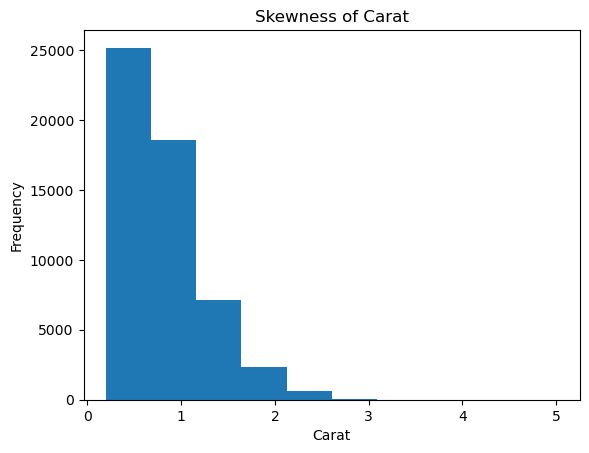

In [11]:
plt.hist(data['carat'])
plt.title("Skewness of Carat")
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.show()

In [12]:
carat_median=data['carat'].median()
data['carat']=data['carat'].fillna(carat_median)

In [13]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [14]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [15]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', nan], dtype=object)

In [16]:
data['color'].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
data['color']=data['color'].fillna('G')


In [18]:
data.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

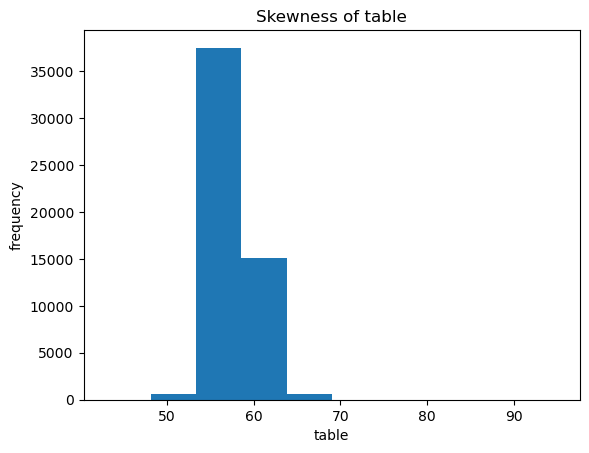

In [19]:
plt.hist(data['table'])
plt.title("Skewness of table")
plt.xlabel("table")
plt.ylabel("frequency")
plt.show()
          

In [20]:
table_median=data['table'].median()
data['table']=data['table'].fillna(table_median)

In [21]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# 2 Outlier Detection

In [22]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [23]:
cols=['carat','table', 'x', 'y', 'z', 'price_new']

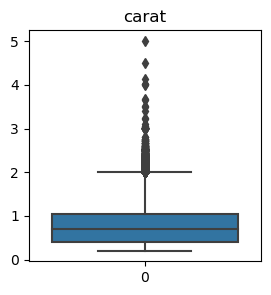

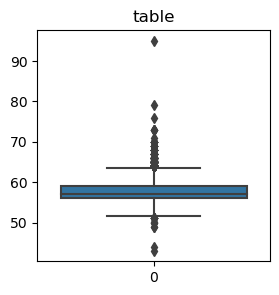

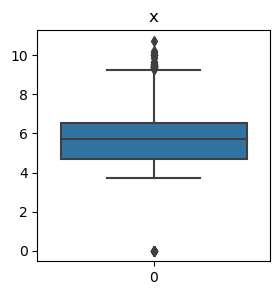

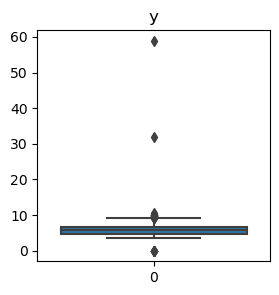

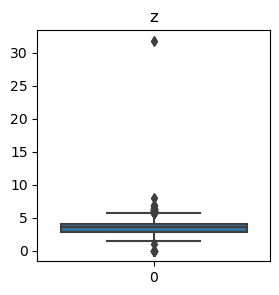

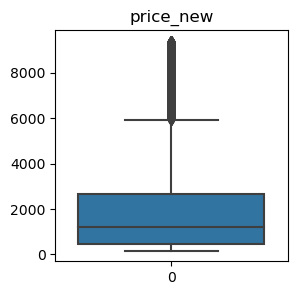

In [24]:
for ca in cols:
    plt.figure(figsize=(3,3))                       
    sns.boxplot(data[ca])
    plt.title(ca)
    plt.show()

In [25]:
# Method 1 Zscore approach

In [26]:
import scipy.stats as stats

In [27]:
data['zr']=stats.zscore(data['carat'])

In [28]:
data[(data['zr']<-3)|(data['zr']>3)]

,carat,cut,color,clarity,table,x,y,z,price_new,zr
13757,2.22,Fair,J,I1,56.0,8.04,8.02,5.36,2803.5,3.000084
14138,2.27,Fair,J,I1,55.0,8.05,8.00,5.43,2866.5,3.105567
15684,2.49,Fair,J,I1,58.0,8.26,8.18,5.45,3144.5,3.569696
16283,3.00,Very Good,H,I1,55.0,9.23,9.10,5.77,3256.0,4.645630
16439,2.22,Fair,H,I1,55.0,7.77,7.74,5.44,3282.0,3.000084
...,...,...,...,...,...,...,...,...,...,...
27727,2.61,Ideal,I,SI2,56.0,8.85,8.73,5.46,9378.0,3.822857
27731,2.55,Premium,I,VS1,62.0,8.70,8.65,5.36,9383.0,3.696276
27739,2.80,Good,G,SI2,58.0,8.90,8.85,4.80,9394.0,4.223695
27744,2.29,Premium,I,SI1,59.0,8.52,8.45,5.24,9398.5,3.147761


In [29]:
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([13757, 14138, 15684, 16283, 16439, 16637, 17181, 17196, 17466,
            17560,
            ...
            27679, 27681, 27684, 27685, 27726, 27727, 27731, 27739, 27744,
            27749],
           dtype='int64', length=439)

In [30]:
data=data.drop([13757, 14138, 15684, 16283, 16439, 16637, 17181, 17196, 17466,
            17560,
            27679, 27681, 27684, 27685, 27726, 27727, 27731, 27739, 27744,
            27749])

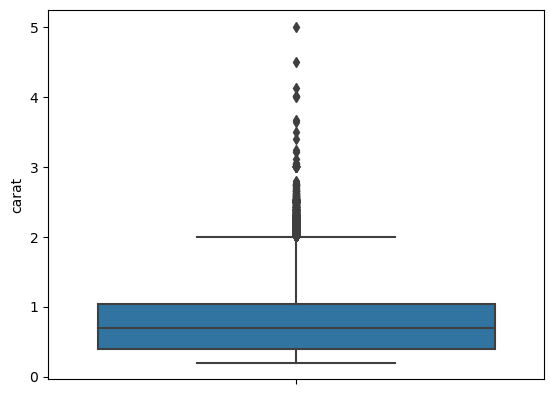

In [31]:
sns.boxplot(y=(data['carat']))
plt.show()

In [32]:
# method 2 IQR

In [33]:
q1=data['carat'].quantile(0.25)
q2=data['carat'].quantile(0.5)
q3=data['carat'].quantile(0.75)

In [34]:
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print("IQR",IQR)
print('Lower Boundary:',lb,"Upper Boundary",ub)

IQR 0.64
Lower Boundary: -0.5599999999999999 Upper Boundary 2.0


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\1749267765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['carat'])


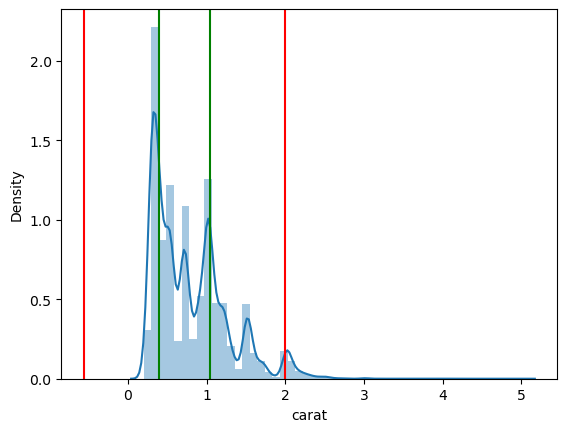

In [35]:
sns.distplot(data['carat'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [36]:
data[(data['carat']<lb) |(data['carat']>ub)].index

Int64Index([12246, 13002, 13118, 13991, 13992, 14912, 14913, 15151, 15319,
            15781,
            ...
            27725, 27728, 27730, 27734, 27736, 27737, 27738, 27741, 27742,
            27746],
           dtype='int64', length=1869)

In [37]:
data=data.drop([12246, 13002, 13118, 13991, 13992, 14912, 14913, 15151, 15319,
            15781,
            27725, 27728, 27730, 27734, 27736, 27737, 27738, 27741, 27742,
            27746])

C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\1749267765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['carat'])


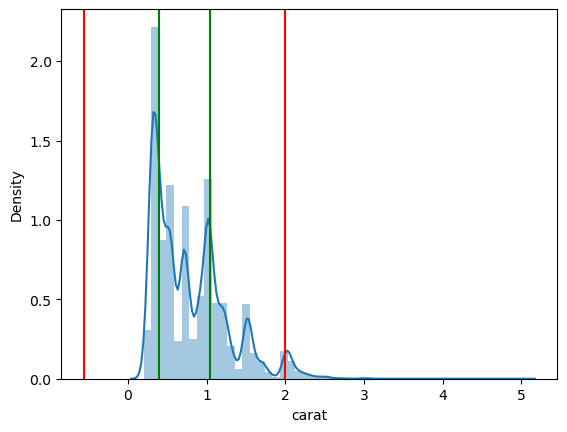

In [38]:
sns.distplot(data['carat'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

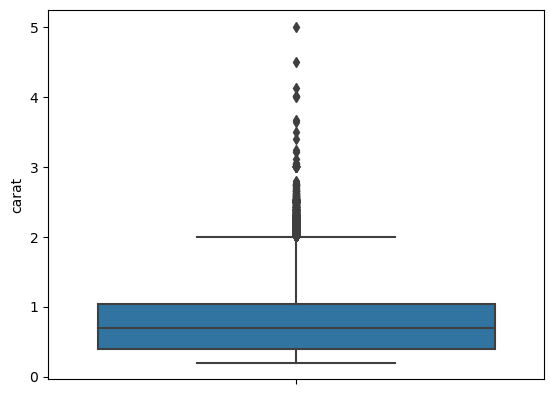

In [39]:
sns.boxplot(y=(data['carat']))
plt.show()

In [40]:
data.shape

(53900, 10)

In [41]:
# Outlier-Table

In [42]:
# method 1 Zscore

In [43]:
data['zr']=stats.zscore(data['table'])
                       

In [44]:
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([    2,    91,   227,   296,   314,   356,   359,   526,   712,
              771,
            ...
            52865, 53064, 53154, 53226, 53503, 53542, 53660, 53695, 53697,
            53785],
           dtype='int64', length=336)

In [45]:
data=data.drop([    2,    91,   227,   296,   314,   356,   359,   526,   712,
              771,
            52865, 53064, 53154, 53226, 53503, 53542, 53660, 53695, 53697,
            53785])

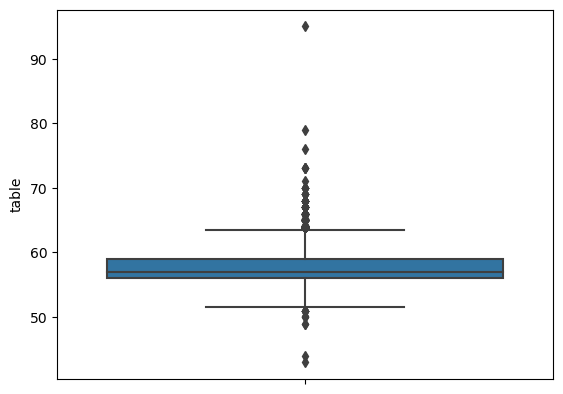

In [46]:
sns.boxplot(y=(data['table']))
plt.show()

In [47]:
# method 2 IQR

In [48]:
q1=data['table'].quantile(0.25)
q2=data['table'].quantile(0.5)
q3=data['table'].quantile(0.75)

In [49]:
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print("IQR:", IQR)
print("Lower Boundary",lb,"Upper Boundary", ub)

IQR: 3.0
Lower Boundary 51.5 Upper Boundary 63.5


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\2802936929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['table'])


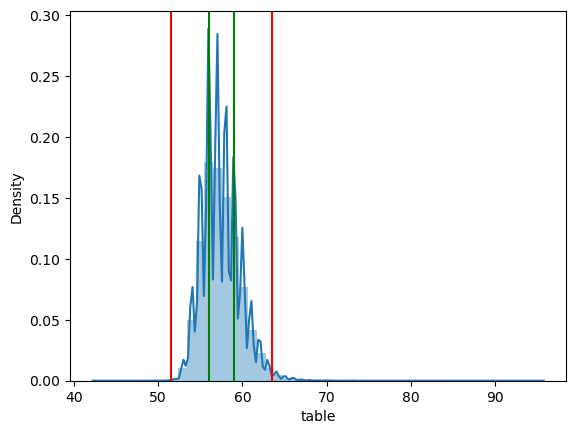

In [50]:
sns.distplot(data['table'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [51]:
data[(data['table']<lb)|(data['table']>ub)].index

Int64Index([  145,   219,   239,   461,   504,   777,   868,   919,   929,
              932,
            ...
            52731, 52748, 52825, 52860, 52861, 52869, 52916, 53577, 53756,
            53757],
           dtype='int64', length=584)

In [52]:
data=data.drop([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939])

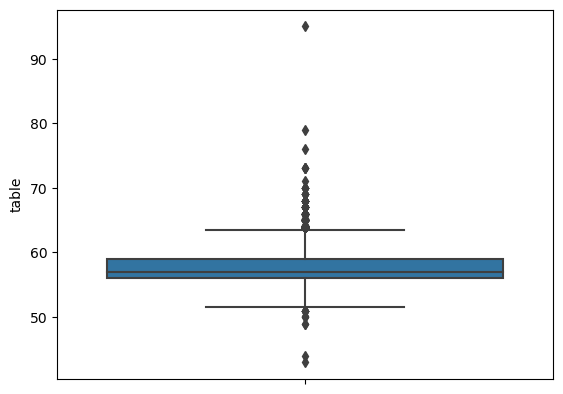

In [53]:
sns.boxplot(y=data['table'])
plt.show()

In [54]:
data.shape

(53860, 10)

In [55]:
# Outlier x

In [56]:
# method Zscore

In [57]:
data['zr']=stats.zscore(data['x'])

In [58]:
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([11182, 11963, 15951, 19339, 19866, 21758, 21862, 22428, 22540,
            22741, 22831, 23580, 23644, 24131, 24297, 24328, 24520, 24816,
            25460, 25850, 25998, 25999, 26100, 26243, 26431, 26444, 26467,
            26534, 26932, 27016, 27130, 27415, 27429, 27514, 27630, 27638,
            27649, 49556, 49557],
           dtype='int64')

In [59]:
data=data.drop([11182, 11963, 15951, 19339, 19866, 21758, 21862, 22428, 22540,
            22741, 22831, 23580, 23644, 24131, 24297, 24328, 24520, 24816,
            25460, 25850, 25998, 25999, 26100, 26243, 26431, 26444, 26467,
            26534, 26932, 27016, 27130, 27415, 27429, 27514, 27630, 27638,
            27649, 49556, 49557])

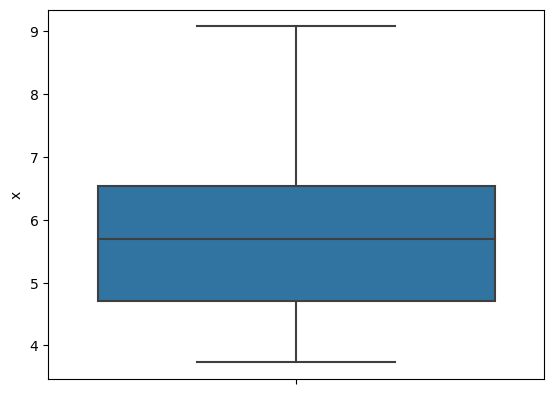

In [60]:
sns.boxplot(y=data['x'])
plt.show()

In [61]:
# Method 2 IQR

In [62]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'zr'],
      dtype='object')

In [63]:
q1=data['x'].quantile(0.25)
q2=data['x'].quantile(0.5)
q3=data['x'].quantile(0.75)

In [64]:
IQR=q3-q1

lb=q1 - (1.5*IQR)
ub=q3 + (1.5*IQR)

In [65]:
print('IQR',IQR)
print("Upper Boundary", ub)
print('Lower Boundary',lb)

IQR 1.83
Upper Boundary 9.285
Lower Boundary 1.9649999999999999


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\3694036022.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])


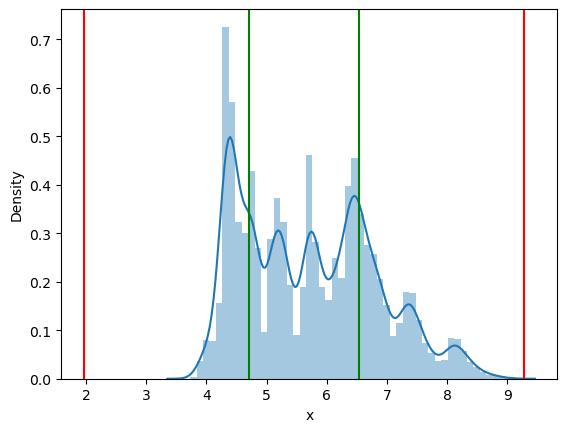

In [66]:
sns.distplot(data['x'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [67]:
data[(data['x']>ub) | (data['x']<lb)].index

Int64Index([], dtype='int64')

In [68]:
data.columns


Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'zr'],
      dtype='object')

In [69]:
data.shape

(53821, 10)

In [70]:
# outlier y

In [71]:
# method 1 Z score

In [72]:
data['zr']=stats.zscore(data['y'])
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([24067, 49189], dtype='int64')

In [73]:
data=data.drop([24067, 49189])

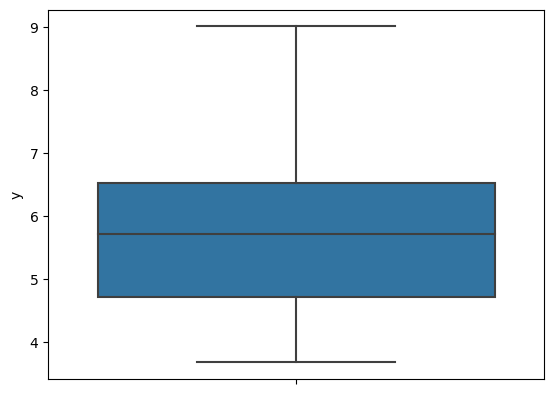

In [74]:
sns.boxplot(y=data['y'])
plt.show()

In [75]:
#method 2: IQR

In [76]:
q1=data['y'].quantile(0.25)
q2=data['y'].quantile(0.5)
q3=data['y'].quantile(0.75)

In [77]:
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print(IQR)
print("Upper Boundary",ub, "Lower Boundary",lb)

1.8100000000000005
Upper Boundary 9.245000000000001 Lower Boundary 2.004999999999999


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\2203667309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y'])


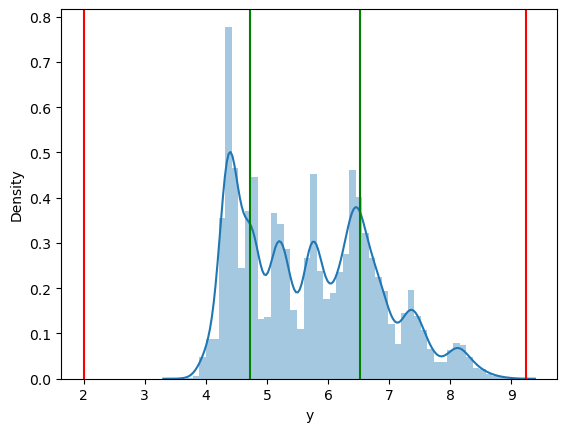

In [78]:
sns.distplot(data['y'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [79]:
data[(data['y']<lb) | (data['y']>ub)].index

Int64Index([], dtype='int64')

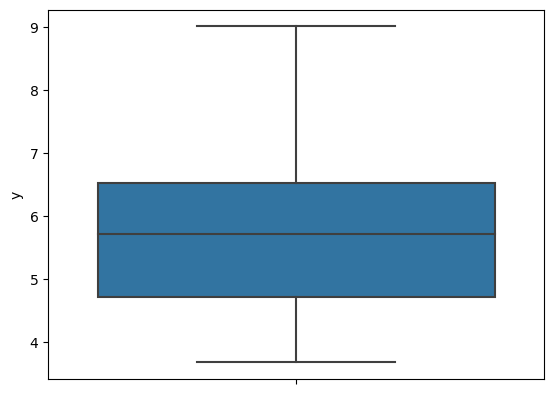

In [80]:
sns.boxplot(y=data['y'])
plt.show()

In [81]:
data.shape

(53819, 10)

In [82]:
# outlier z

In [83]:
# Method 2 IQR

In [84]:
q1=data['z'].quantile(0.25)
q2=data['z'].quantile(0.5)
q3=data['z'].quantile(0.75)


In [85]:
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print(IQR)
print("Upper Boundary",ub,'Lower Boundary',lb)

1.12
Upper Boundary 5.710000000000001 Lower Boundary 1.23


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\1775063025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['z'])


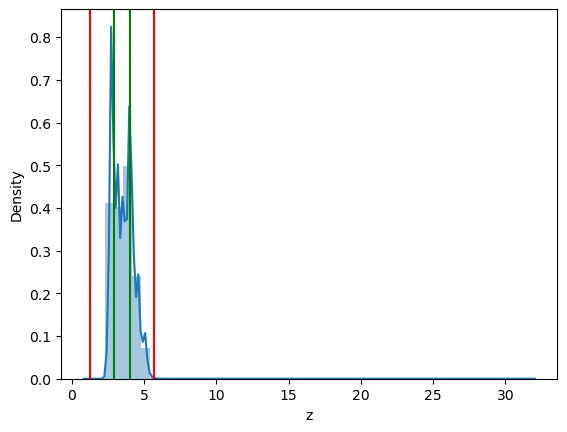

In [86]:
sns.distplot(data['z'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [87]:
data[(data['z']<lb)|(data['z']>ub)].index

Int64Index([14635, 19346, 23539, 26194, 26744, 26933, 27515, 27516, 27517,
            27518, 48410],
           dtype='int64')

In [88]:
data=data.drop([14635, 19346, 23539, 26194, 26744, 26933, 27515, 27516, 27517,
            27518, 48410])

C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\1775063025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['z'])


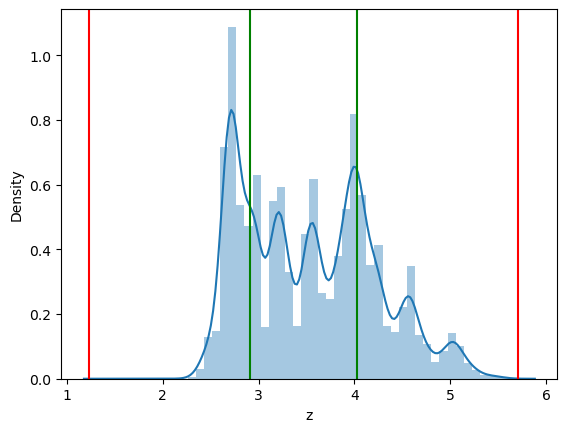

In [89]:
sns.distplot(data['z'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

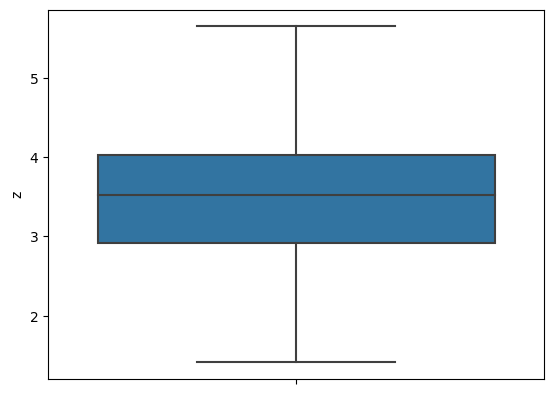

In [90]:
sns.boxplot(y=data['z'])
plt.show()

In [91]:
# method 1 Zcore

In [92]:
data["zr"]=stats.zscore(data['z'])

In [93]:
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([20462, 21654, 22004, 27065], dtype='int64')

In [94]:
data=data.drop([20462, 21654, 22004, 27065])

In [95]:
data.shape

(53804, 10)

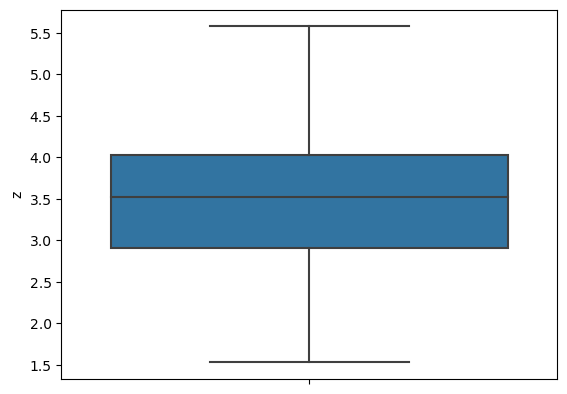

In [96]:
sns.boxplot(y=data['z'])
plt.show()

In [97]:
# Outlier price_new

In [98]:

#method zscore


In [99]:
data['zr']=stats.zscore(data['price_new'])
data[(data['zr']<-3)|(data['zr']>3)].index

Int64Index([26327, 26328, 26329, 26330, 26331, 26332, 26333, 26334, 26335,
            26336,
            ...
            27724, 27729, 27732, 27733, 27735, 27740, 27743, 27745, 27747,
            27748],
           dtype='int64', length=1203)

In [100]:
data=data.drop([26327, 26328, 26329, 26330, 26331, 26332, 26333, 26334, 26335,
            26336,
            27724, 27729, 27732, 27733, 27735, 27740, 27743, 27745, 27747,
            27748])

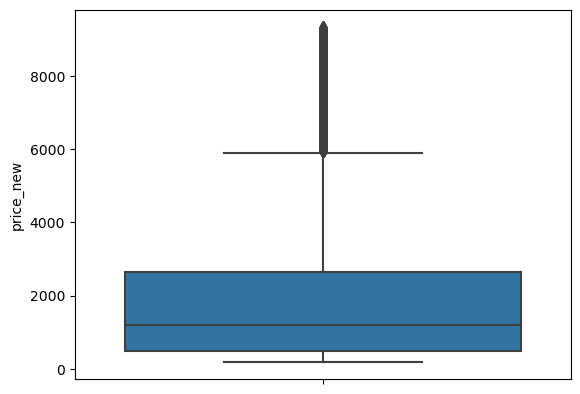

In [101]:
sns.boxplot(y=data['price_new'])
plt.show()

In [102]:
# method IQR

In [103]:
q1=data["price_new"].quantile(0.25)
q2=data['price_new'].quantile(0.5)
q3=data['price_new'].quantile(0.75)

In [104]:
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print("Upper Boundary",ub,"Lower Boundary",lb)

Upper Boundary 5916.5 Lower Boundary -2791.5


C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\543613362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price_new'])


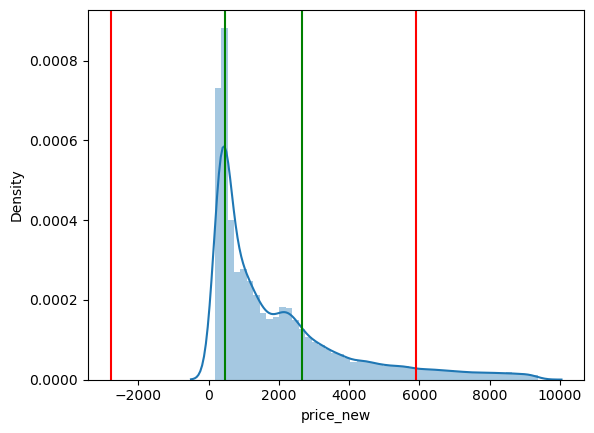

In [105]:
sns.distplot(data['price_new'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

In [106]:
data[(data['price_new']<lb)|(data['price_new']>ub)].index

Int64Index([23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783,
            23784,
            ...
            27682, 27683, 27686, 27687, 27688, 27689, 27720, 27721, 27722,
            27723],
           dtype='int64', length=3512)

In [107]:
data=data.drop([23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783,
            23784,
            27682, 27683, 27686, 27687, 27688, 27689, 27720, 27721, 27722,
            27723])

C:\Users\mothe\AppData\Local\Temp\ipykernel_19356\543613362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price_new'])


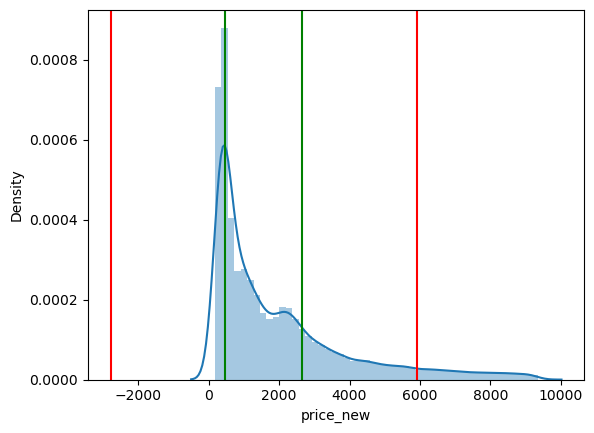

In [108]:
sns.distplot(data['price_new'])
plt.axvline(ub, color = "r")
plt.axvline(lb, color = "r")
plt.axvline(q1, color = "g")
plt.axvline(q3, color = "g")
plt.show()

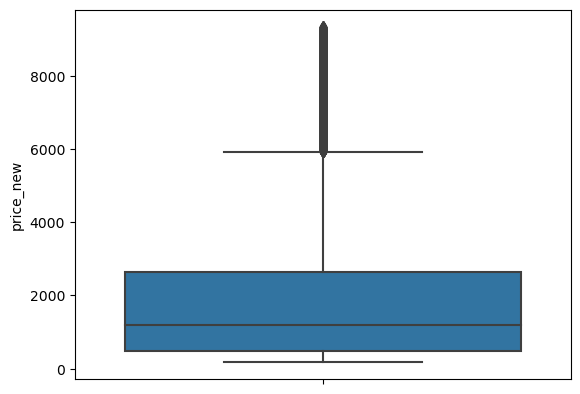

In [109]:
sns.boxplot(y=data['price_new'])
plt.show()

In [110]:
data.shape

(53764, 10)

# 3. Scaling

In [111]:
# Standard Scaler

In [112]:
data.describe()

,carat,table,x,y,z,price_new,zr
count,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000
mean,0.794228,57.452236,5.725877,5.727806,3.535812,1954.742541,-0.002320
std,0.466821,2.227098,1.112585,1.104673,0.686815,1978.366983,0.996567
min,0.200000,43.000000,3.730000,3.680000,1.530000,170.000000,-0.901352
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.000000,-0.748217
50%,0.700000,57.000000,5.690000,5.710000,3.520000,1197.500000,-0.383767
75%,1.040000,59.000000,6.540000,6.530000,4.030000,2648.000000,0.346897
max,2.800000,95.000000,9.080000,9.010000,5.580000,9352.500000,3.724169


In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53764 entries, 11 to 53929
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53764 non-null  float64
 1   cut        53764 non-null  object 
 2   color      53764 non-null  object 
 3   clarity    53764 non-null  object 
 4   table      53764 non-null  float64
 5   x          53764 non-null  float64
 6   y          53764 non-null  float64
 7   z          53764 non-null  float64
 8   price_new  53764 non-null  float64
 9   zr         53764 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [116]:
data.loc[:,['carat', 'table','x','y','z']] = sc.fit_transform(data[['carat', 'table','x','y','z']])

In [117]:
data.describe()

,carat,table,x,y,z,price_new,zr
count,5.376400e+04,5.376400e+04,5.376400e+04,5.376400e+04,5.376400e+04,53764.000000,53764.000000
mean,-2.622046e-16,1.234899e-15,8.204466e-16,8.077593e-16,-7.358645e-16,1954.742541,-0.002320
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1978.366983,0.996567
min,-1.272936e+00,-6.489328e+00,-1.793927e+00,-1.853785e+00,-2.920482e+00,170.000000,-0.901352
25%,-8.445026e-01,-6.520814e-01,-9.130868e-01,-9.123205e-01,-9.111886e-01,474.000000,-0.748217
50%,-2.018524e-01,-2.030624e-01,-3.224698e-02,-1.611909e-02,-2.302253e-02,1197.500000,-0.383767
75%,5.264846e-01,6.949756e-01,7.317467e-01,7.261891e-01,7.195425e-01,2648.000000,0.346897
max,4.296699e+00,1.685966e+01,3.014740e+00,2.971219e+00,2.976358e+00,9352.500000,3.724169


In [118]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,zr
11,-1.208671,Ideal,J,VS1,-0.652081,-1.614163,-1.654629,-1.566393,170.0,-0.901352
12,-1.230093,Premium,F,SI1,1.593014,-1.659104,-1.708944,-1.755674,171.0,-0.900848
13,-1.037298,Ideal,J,SI2,-1.550119,-1.236661,-1.229159,-1.202391,172.0,-0.900344
14,-1.272936,Premium,E,SI2,2.042033,-1.739998,-1.790417,-1.843035,172.5,-0.900092
15,-1.015876,Premium,E,I1,0.245957,-1.209696,-1.183897,-1.246071,172.5,-0.900092
...,...,...,...,...,...,...,...,...,...,...
53925,-0.009057,Ideal,I,SI1,-0.652081,0.201445,0.219247,0.195379,1378.0,-0.292843
53926,-0.180431,Ideal,E,SI1,-0.652081,-0.014271,0.001986,0.006098,1378.0,-0.292843
53927,-0.009057,Good,F,SI1,0.694976,0.300315,0.364088,0.006098,1378.0,-0.292843
53928,-0.009057,Premium,E,SI2,0.245957,0.273351,0.210194,0.209939,1378.0,-0.292843


In [119]:
# Minmax scaler

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
mn=MinMaxScaler()

In [122]:
data.loc[:,['carat', 'table','x','y','z','price_new']] = mn.fit_transform(data[['carat', 'table','x','y','z','price_new']])

In [123]:
data.describe()

,carat,table,x,y,z,price_new,zr
count,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000
mean,0.228549,0.277928,0.373061,0.384204,0.495262,0.194363,-0.002320
std,0.179547,0.042829,0.207960,0.207256,0.169584,0.215450,0.996567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.901352
25%,0.076923,0.250000,0.183178,0.195122,0.340741,0.033106,-0.748217
50%,0.192308,0.269231,0.366355,0.380863,0.491358,0.111898,-0.383767
75%,0.323077,0.307692,0.525234,0.534709,0.617284,0.269861,0.346897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.724169


# 4. Encoding

In [124]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,zr
11,0.011538,Ideal,J,VS1,0.250000,0.037383,0.041276,0.229630,0.000000,-0.901352
12,0.007692,Premium,F,SI1,0.346154,0.028037,0.030019,0.197531,0.000109,-0.900848
13,0.042308,Ideal,J,SI2,0.211538,0.115888,0.129456,0.291358,0.000218,-0.900344
14,0.000000,Premium,E,SI2,0.365385,0.011215,0.013133,0.182716,0.000272,-0.900092
15,0.046154,Premium,E,I1,0.288462,0.121495,0.138837,0.283951,0.000272,-0.900092
...,...,...,...,...,...,...,...,...,...,...
53925,0.226923,Ideal,I,SI1,0.250000,0.414953,0.429644,0.528395,0.131555,-0.292843
53926,0.196154,Ideal,E,SI1,0.250000,0.370093,0.384615,0.496296,0.131555,-0.292843
53927,0.226923,Good,F,SI1,0.307692,0.435514,0.459662,0.496296,0.131555,-0.292843
53928,0.226923,Premium,E,SI2,0.288462,0.429907,0.427767,0.530864,0.131555,-0.292843


In [125]:
data=data.drop('zr',axis=1)

In [126]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
11,0.011538,Ideal,J,VS1,0.250000,0.037383,0.041276,0.229630,0.000000
12,0.007692,Premium,F,SI1,0.346154,0.028037,0.030019,0.197531,0.000109
13,0.042308,Ideal,J,SI2,0.211538,0.115888,0.129456,0.291358,0.000218
14,0.000000,Premium,E,SI2,0.365385,0.011215,0.013133,0.182716,0.000272
15,0.046154,Premium,E,I1,0.288462,0.121495,0.138837,0.283951,0.000272
...,...,...,...,...,...,...,...,...,...
53925,0.226923,Ideal,I,SI1,0.250000,0.414953,0.429644,0.528395,0.131555
53926,0.196154,Ideal,E,SI1,0.250000,0.370093,0.384615,0.496296,0.131555
53927,0.226923,Good,F,SI1,0.307692,0.435514,0.459662,0.496296,0.131555
53928,0.226923,Premium,E,SI2,0.288462,0.429907,0.427767,0.530864,0.131555


In [127]:
data['cut'].nunique()

5

In [128]:
# Label encoding for column cut

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()
data['cut']=le.fit_transform(data['cut'])

In [131]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
11,0.011538,2,J,VS1,0.250000,0.037383,0.041276,0.229630,0.000000
12,0.007692,3,F,SI1,0.346154,0.028037,0.030019,0.197531,0.000109
13,0.042308,2,J,SI2,0.211538,0.115888,0.129456,0.291358,0.000218
14,0.000000,3,E,SI2,0.365385,0.011215,0.013133,0.182716,0.000272
15,0.046154,3,E,I1,0.288462,0.121495,0.138837,0.283951,0.000272
...,...,...,...,...,...,...,...,...,...
53925,0.226923,2,I,SI1,0.250000,0.414953,0.429644,0.528395,0.131555
53926,0.196154,2,E,SI1,0.250000,0.370093,0.384615,0.496296,0.131555
53927,0.226923,1,F,SI1,0.307692,0.435514,0.459662,0.496296,0.131555
53928,0.226923,3,E,SI2,0.288462,0.429907,0.427767,0.530864,0.131555


In [132]:
x=data.drop('price_new',axis=1)
y=data['price_new']

In [133]:
x=pd.get_dummies(x)

In [134]:
x

,carat,cut,table,x,y,z,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
11,0.011538,2,0.250000,0.037383,0.041276,0.229630,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
12,0.007692,3,0.346154,0.028037,0.030019,0.197531,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
13,0.042308,2,0.211538,0.115888,0.129456,0.291358,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
14,0.000000,3,0.365385,0.011215,0.013133,0.182716,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
15,0.046154,3,0.288462,0.121495,0.138837,0.283951,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.226923,2,0.250000,0.414953,0.429644,0.528395,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
53926,0.196154,2,0.250000,0.370093,0.384615,0.496296,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53927,0.226923,1,0.307692,0.435514,0.459662,0.496296,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53928,0.226923,3,0.288462,0.429907,0.427767,0.530864,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=134)